In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

Aşağıdaki kodlar bir tek değişkenli veri seti için lineer regression kullanılarak bir model eğitimi yapmayı göstermektedir.

İlk olarak bize ilgili w ve b değerleri için veri setine göre cost hesaplaması yapmak için **"hata kareler"** cost fonksiyonunu tanımlayalım. 

In [20]:
x_train = np.array([98,97,93,86,80,74,67,60,25,50,10,37])
y_train = np.array([134,130,128,125,120,116,112,100,90,92,95,93])
# 
# x_train = np.array([1.0, 2.0])   #features
# y_train = np.array([300.0, 500.0])   #target value

def compute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost_i = (f_wb - y[i]) ** 2
        total_cost += cost_i
    
    total_cost /= 2 * m
    return total_cost

Şimdi ise J(w,b) *cost function* için kısmi türev hesabı yapmamız gerekiyor. O yüzden w ve b değerlerinin değişim oranını hesaplayalım. Bu değişim oranına bakarak **w ve b** parametreleri için yeni değerlerini hesaplayabilirirz.

In [30]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db /= m
    dj_dw /= m
    
    return dj_dw, dj_db

Şimdi modelimizi artık eğiteceğimiz kısma geldik. Elimizde sağlanan w ve b değerleri için değişim oranı hesaplayan bir fonksiyonumuz var.
Artık bu fonksiyonu ve ek birkaç değeri daha kullanarak en düşük cost değerini sağlayan bir w ve b değeri bulabiliriz.

In [41]:
def gradient_descent(x,y,w_in,b_in,num_iters,alpha,cost_function,gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    J_History = []
    p_History = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            J_History.append(cost_function(x,y,w,b))
            p_History.append([w,b])
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration: {i:4}: Cost {J_History[-1]:0.2e}", 
                  f"dj_dw: {dj_dw:0.3e} dj_db: {dj_db:0.3e}",
                  f"w: {w:0.3e} b: {b:0.5e}")
            
    return w, b, J_History, p_History

In [62]:
w_init = 0
b_init = 0

iterations = 200000
tmp_alpha = 1.0e-4  #1.0e-2 demek 1.0 * 10^-2 demektir.

w_final, b_final, j_History, p_history = gradient_descent(x_train, y_train,w_init, b_init, iterations, tmp_alpha,compute_cost, compute_gradient)

print(f"(w,b) değerleri yapay zeka taraından tespit edilmiştir: ({w_final, b_final})" )

Iteration:    0: Cost 1.96e+03 dj_dw: -7.610e+03 dj_db: -1.112e+02 w: 7.610e-01 b: 1.11250e-02
Iteration: 20000: Cost 2.67e+02 dj_dw: 1.150e-01 dj_db: -8.824e+00 w: 1.262e+00 b: 2.07339e+01
Iteration: 40000: Cost 1.51e+02 dj_dw: 8.417e-02 dj_db: -6.458e+00 w: 1.064e+00 b: 3.58930e+01
Iteration: 60000: Cost 8.91e+01 dj_dw: 6.160e-02 dj_db: -4.726e+00 w: 9.195e-01 b: 4.69874e+01
Iteration: 80000: Cost 5.59e+01 dj_dw: 4.509e-02 dj_db: -3.459e+00 w: 8.136e-01 b: 5.51072e+01
Iteration: 100000: Cost 3.81e+01 dj_dw: 3.300e-02 dj_db: -2.532e+00 w: 7.362e-01 b: 6.10498e+01
Iteration: 120000: Cost 3.81e+01 dj_dw: 2.415e-02 dj_db: -1.853e+00 w: 6.795e-01 b: 6.53990e+01
Iteration: 140000: Cost 3.81e+01 dj_dw: 1.767e-02 dj_db: -1.356e+00 w: 6.380e-01 b: 6.85820e+01
Iteration: 160000: Cost 3.81e+01 dj_dw: 1.294e-02 dj_db: -9.925e-01 w: 6.077e-01 b: 7.09116e+01
Iteration: 180000: Cost 3.81e+01 dj_dw: 9.467e-03 dj_db: -7.263e-01 w: 5.854e-01 b: 7.26166e+01
(w,b) değerleri yapay zeka taraından tespit e

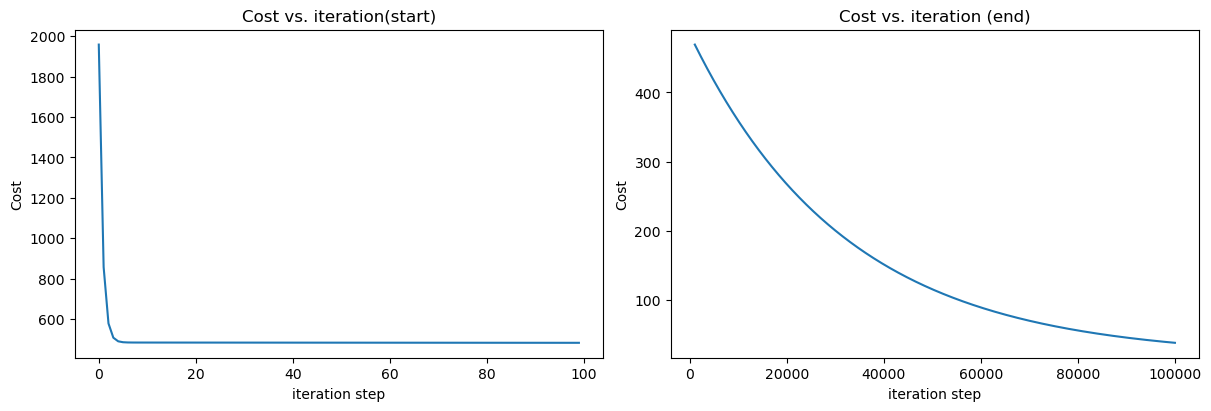

In [63]:
# plot cost versus iteration => Adım adım çizdirme  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_History[:100])
ax2.plot(1000 + np.arange(len(j_History[1000:])), j_History[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [68]:
print(f"Tahiri öğrencisinin tahmini iq değeri: {w_final*98.0 + b_final:0.1f}")
print(f"Sadık öğrencisinin tahmini iq değeri: {w_final * 92.0 + b_final:0.1f}")
print(f"Ağbal öğrencisinin tahmini iq değeri: {w_final * 100.0 + b_final:0.1f}")

Tahiri öğrencisinin tahmini iq değeri: 129.6
Sadık öğrencisinin tahmini iq değeri: 126.2
Ağbal öğrencisinin tahmini iq değeri: 130.8
